# Connect G-Drive

In [257]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [258]:
import os
default_dir = "/content/drive/MyDrive/Digital_Skola Bootcamp Batch 30/FINALPROJECT_KEL"
os.chdir(default_dir)

In [259]:
!ls

 app.py				        model_RF.pkl
 get-pip.py			        Pipfile
 healthcare-dataset-heart_disease.csv   Pipfile.lock
 healthcare-dataset-stroke-data.csv     requirements.txt
 ml_app.py			       '[Sandbox]Heart_Disease_Prediction_Final_Project.ipynb'
 model_LGBM.pkl


# Import Libraries

In [260]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import itertools

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, LocalOutlierFactor
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import (
    train_test_split, KFold, cross_val_score, GridSearchCV)

from sklearn.preprocessing import (
    scale, LabelEncoder, StandardScaler,
    MinMaxScaler, Normalizer, RobustScaler, OrdinalEncoder
)

from sklearn.metrics import (
    classification_report, accuracy_score, f1_score,
    precision_score, confusion_matrix, recall_score,
    roc_auc_score, roc_curve
)

from sklearn.impute import (
    SimpleImputer, KNNImputer
)

from scipy.stats.mstats import winsorize

# Handling Imbalance Data
from imblearn.over_sampling import SMOTE

# 1.&nbsp;Load Dataset

## 1.1 Description

Data Set Story:
- It consists of 5110 observations and 10 variables.
- Independent variables contain information about patient.
- Dependent variable refers to heart disease.

This dataset is used to predict whether a patient is likely to get heart disease based on the input parameters like gender, age, hypertension, ever married, work type, residence type. average glucose level, bmi,  and smoking status. Each row in the data provides relavant information about the patient.

Features:

1) id: unique identifier

2) gender: "Male", "Female" or "Other"

3) age: age of the patient

4) hypertension: 0=if the patient doesn't have hypertension, 1=if the patient has hypertension

5) ever_married: "No" or "Yes"

6) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

7) Residence_type: "Rural" or "Urban"

8) avg_glucose_level: average glucose level in blood

9) bmi: body mass index

Below 18.5 -> Underweight

18.5 – 24.9 -> Normal or Healthy Weight

25.0 – 29.9 -> Overweight

30.0 and Above -> Obese


https://www.cdc.gov/healthyweight/assessing/index.html


10) smoking_status: "formerly smoked",
"never smoked", "smokes" or "Unknown"*

11) heart_disease: 0= if the patient doesn't have any heart diseases, 1= if the patient has a heart disease

In [261]:
df = pd.read_csv("healthcare-dataset-heart_disease.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked


In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [263]:
df.shape

(5110, 11)

In [264]:
df.count()

id                   5110
gender               5110
age                  5110
hypertension         5110
heart_disease        5110
ever_married         5110
work_type            5110
Residence_type       5110
avg_glucose_level    5110
bmi                  4909
smoking_status       5110
dtype: int64

BMI ada yang missing

# 2.&nbsp;Data Preprocessing

## 2.1 &nbsp;EDA


### 2.1.1 &nbsp;Independent Columns

In [265]:
#cek ringkasan data numerik
# MASUKIN
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000


#### Age

In [266]:
df['age'].value_counts()

78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: age, Length: 104, dtype: int64

In [267]:
"""
df['age_kat'] = pd.cut(
    x=df['age'],
    bins=[0, 17.00,100],
    labels=["usia muda", "usia tua"]
)
"""
#df['age_kat'].value_counts(normalize=True)

'\ndf[\'age_kat\'] = pd.cut(\n    x=df[\'age\'],\n    bins=[0, 17.00,100],\n    labels=["usia muda", "usia tua"]\n)\n'

In [268]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked


In [269]:
df.loc[df["age"] < 18.0][["age", "work_type"]]

,age,work_type
162,1.32,children
245,14.00,children
249,3.00,children
251,8.00,Private
253,14.00,Never_worked
...,...,...
5089,0.72,children
5094,13.00,children
5095,1.08,children
5098,9.00,children


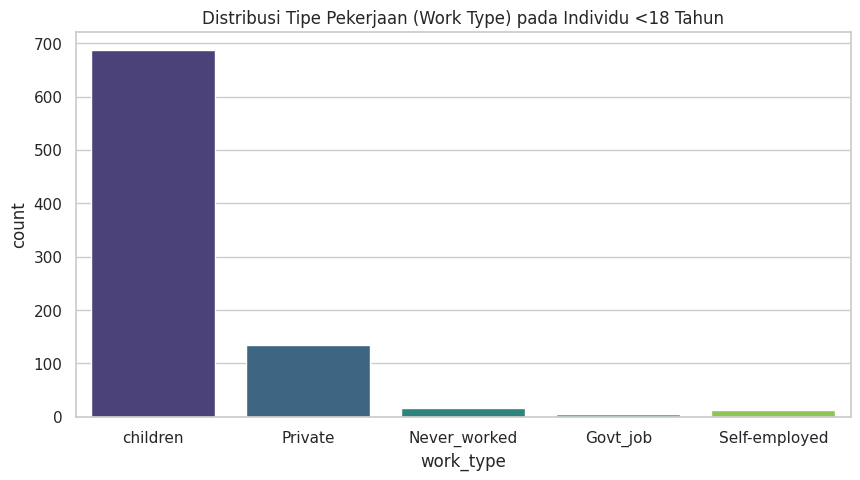

In [270]:
# Filter data untuk individu di bawah usia 18 tahun
under_18_data = df.loc[df["age"] < 18.0]

# Membuat plot
plt.figure(figsize=(10, 5))
sns.countplot(x="work_type", data=under_18_data, palette="viridis")
plt.title("Distribusi Tipe Pekerjaan (Work Type) pada Individu <18 Tahun")
plt.xticks(rotation=0)
plt.show()


In [271]:
#usia <18 tahun yang bekerja di pemerintahan
df.loc[(df["age"] < 18.0) & (df["work_type"] == "Govt_job")][["age", "work_type"]]

,age,work_type
284,14.0,Govt_job
1589,17.0,Govt_job
2747,17.0,Govt_job
3300,15.0,Govt_job
3401,17.0,Govt_job
4766,16.0,Govt_job


In [272]:
df.loc[(df["age"] < 18.0) & (df["work_type"] == "Never_worked")][["age", "work_type"]]

,age,work_type
253,14.0,Never_worked
939,13.0,Never_worked
959,17.0,Never_worked
1462,17.0,Never_worked
1789,13.0,Never_worked
1922,16.0,Never_worked
2346,14.0,Never_worked
2721,17.0,Never_worked
2740,15.0,Never_worked
2781,16.0,Never_worked


In [273]:
df.loc[(df["age"]== 16.0) & (df["work_type"] == "children")][["age", "work_type"]]

,age,work_type
292,16.0,children
461,16.0,children
921,16.0,children
1455,16.0,children
2530,16.0,children
3357,16.0,children
3719,16.0,children
4018,16.0,children
4545,16.0,children
4604,16.0,children


In [274]:
#df.loc[df["age_kat"]== "usia muda", "work_type"]

In [275]:
df.loc[df["age"] < 18.0][["smoking_status","age"]]

,smoking_status,age
162,Unknown,1.32
245,Unknown,14.00
249,Unknown,3.00
251,Unknown,8.00
253,Unknown,14.00
...,...,...
5089,Unknown,0.72
5094,Unknown,13.00
5095,Unknown,1.08
5098,Unknown,9.00


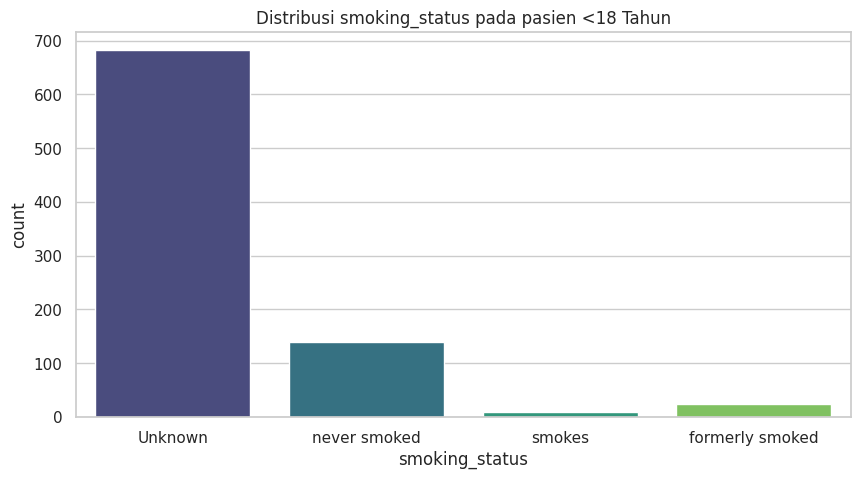

In [276]:
# Filter data untuk individu di bawah usia 18 tahun
under_18_data = df.loc[df["age"] < 18.0]

# Membuat plot
plt.figure(figsize=(10, 5))
sns.countplot(x="smoking_status", data=under_18_data, palette="viridis")
plt.title("Distribusi smoking_status pada pasien <18 Tahun")
plt.xticks(rotation=0)
plt.show()

In [277]:
#df.loc[df["age_kat"]== "usia muda"][["smoking_status","age"]]

In [278]:
df.loc[df["age"] < 1.00]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
363,7559,Female,0.64,0,0,No,children,Urban,83.82,24.9,Unknown
376,22706,Female,0.88,0,0,No,children,Rural,88.11,15.5,Unknown
564,61511,Female,0.32,0,0,No,children,Rural,73.71,16.2,Unknown
982,54747,Male,0.88,0,0,No,children,Rural,157.57,19.2,Unknown
996,53279,Male,0.24,0,0,No,children,Rural,118.87,16.3,Unknown
1093,66772,Female,0.32,0,0,No,children,Rural,55.86,16.0,Unknown
1206,68908,Female,0.72,0,0,No,children,Urban,66.36,23.0,Unknown
1317,30084,Male,0.80,0,0,No,children,Rural,98.67,17.5,Unknown
1600,40544,Male,0.40,0,0,No,children,Urban,109.56,14.3,Unknown
1614,47350,Female,0.08,0,0,No,children,Urban,139.67,14.1,Unknown


In [279]:
#membuat mask untuk age yang <1 bulan
count_age = len(df[df["age"] < 1.00])
count_age

43

In [280]:
#usia <1 tahun dengan status merokok
df.loc[df["age"] < 1.00][["smoking_status","age"]]

,smoking_status,age
363,Unknown,0.64
376,Unknown,0.88
564,Unknown,0.32
982,Unknown,0.88
996,Unknown,0.24
1093,Unknown,0.32
1206,Unknown,0.72
1317,Unknown,0.80
1600,Unknown,0.40
1614,Unknown,0.08


#### BMI

In [281]:
df['bmi'].value_counts()

28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: bmi, Length: 418, dtype: int64

In [282]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
dtype: int64



*   ada 201 nan value pada bmi




In [283]:
#usia dengan bmi
#df.loc[df["age"] < 18.0][["bmi"]]

In [284]:
#usia <1 tahun dengan bmi
df.loc[df["age"] < 1.00][["bmi"]]

,bmi
363,24.9
376,15.5
564,16.2
982,19.2
996,16.3
1093,16.0
1206,23.0
1317,17.5
1600,14.3
1614,14.1


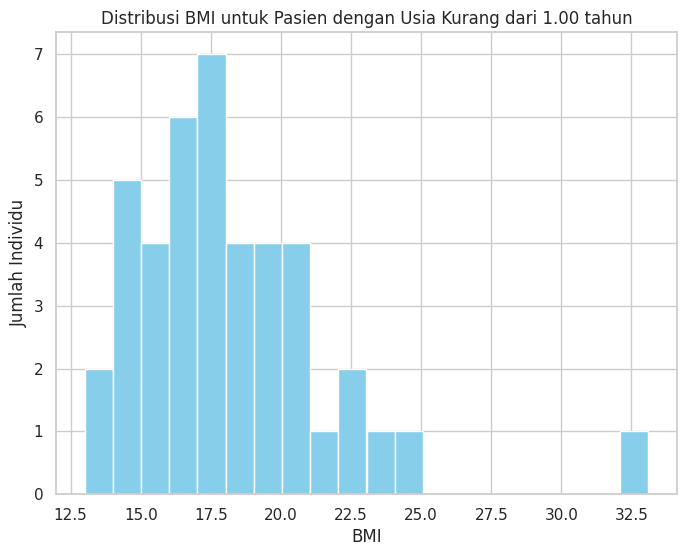

In [158]:
import matplotlib.pyplot as plt

# Filter data untuk individu dengan usia kurang dari 1.00
usia_under_1tahun = df[df["age"] < 1.00]

# Membuat histogram dari data "bmi"
plt.figure(figsize=(8, 6))
plt.hist(usia_under_1tahun["bmi"], bins=20, color='skyblue')
plt.title("Distribusi BMI untuk Pasien dengan Usia Kurang dari 1.00 tahun")
plt.xlabel("BMI")
plt.ylabel("Jumlah Individu")
plt.show()


In [285]:
result = df[df["age"] < 1.00].groupby("bmi").size()
result

bmi
13.0    1
13.9    1
14.1    2
14.2    1
14.3    1
14.8    1
15.1    1
15.5    2
16.0    1
16.2    2
16.3    1
16.4    1
16.8    1
16.9    1
17.3    2
17.4    3
17.5    1
17.8    1
18.3    1
18.5    1
18.6    1
18.9    1
19.2    1
19.4    1
19.6    1
19.9    1
20.1    2
20.7    1
20.8    1
21.1    1
22.4    1
23.0    1
23.4    1
24.9    1
33.1    1
dtype: int64

#### Average Glucose Level

In [286]:
df['avg_glucose_level'].value_counts()

93.88     6
91.68     5
91.85     5
83.16     5
73.00     5
         ..
111.93    1
94.40     1
95.57     1
66.29     1
85.28     1
Name: avg_glucose_level, Length: 3979, dtype: int64

<Axes: xlabel='avg_glucose_level', ylabel='Count'>

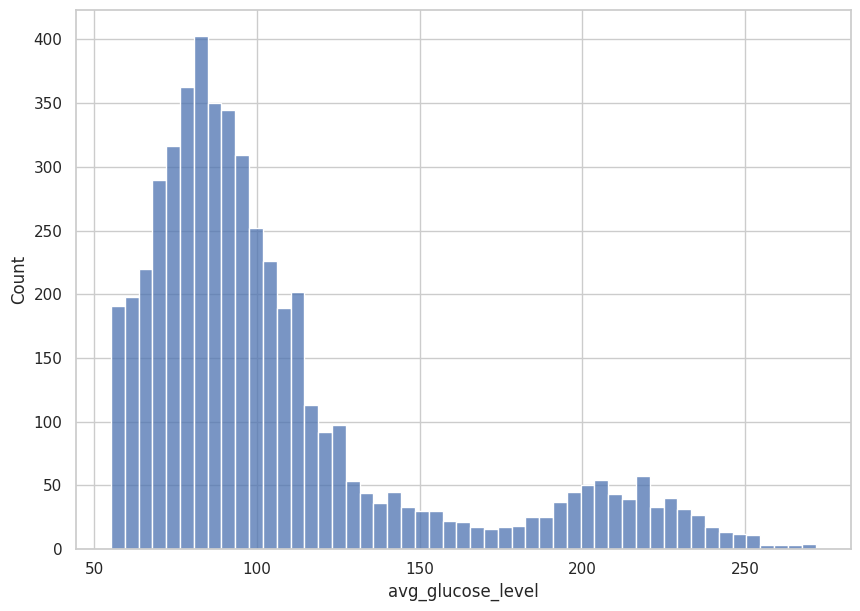

In [287]:
sns.histplot(df['avg_glucose_level'])

In [288]:
#dikatagorikan?

#### Missing data of Numerical feature

In [289]:
# Let's select the columns of the train set with numerical data
df_num = df.select_dtypes(exclude=["object", "int64"])
df_num.head()

,age,avg_glucose_level,bmi
0,67.0,228.69,36.6
1,61.0,202.21,NaN
2,80.0,105.92,32.5
3,49.0,171.23,34.4
4,79.0,174.12,24.0


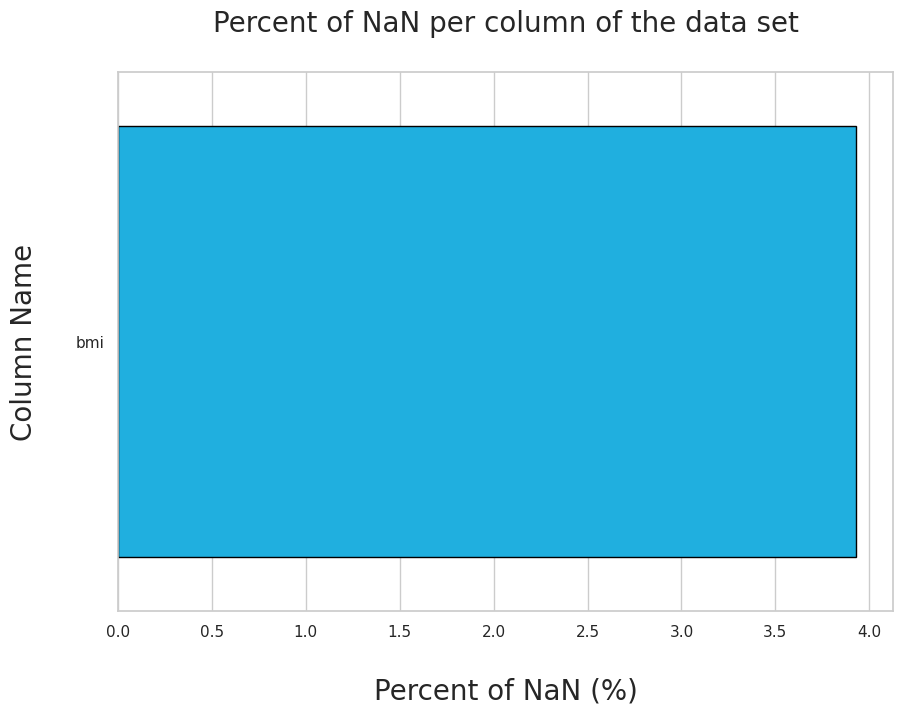

In [290]:
# Check the NaN of by ploting percent of missing values per column
column_with_nan = df_num.columns[df_num.isnull().any()]
column_name = []
percent_nan = []

for i in column_with_nan:
    column_name.append(i)
    percent_nan.append(round(df_num[i].isnull().sum()*100/len(df_num), 2))

tab = pd.DataFrame(column_name, columns=["Column"])
tab["Percent_NaN"] = percent_nan
tab.sort_values(by=["Percent_NaN"], ascending=False, inplace=True)


# Define figure parameters
sns.set(rc={"figure.figsize": (10, 7)})
sns.set_style("whitegrid")

# Plot results
p = sns.barplot(
    x="Percent_NaN",
    y="Column",
    data=tab,
    edgecolor="black",
    color="deepskyblue"
)

p.set_title("Percent of NaN per column of the data set\n", fontsize=20)
p.set_xlabel("\nPercent of NaN (%)", fontsize=20)
p.set_ylabel("Column Name\n", fontsize=20);

#### ada nan value pada variabel BMI <4%

In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


#### Gender

In [292]:
df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [293]:
#others akan di drop
df["gender"].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

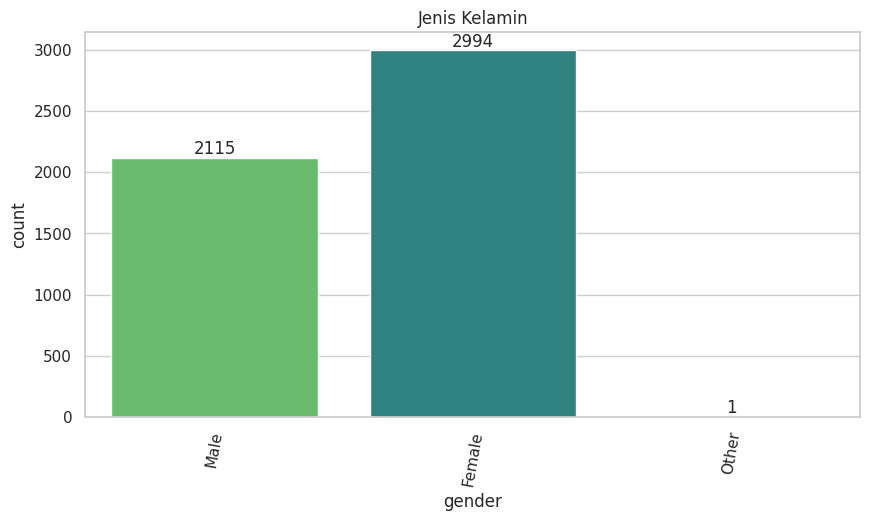

In [294]:
fig, ax = plt.subplots(figsize=(10,5))
ax=sns.countplot(x='gender', data=df, palette='viridis_r')
ax.set_xticklabels(ax.get_xticklabels(), rotation=80);
ax.bar_label(ax.containers[0])
plt.title('Jenis Kelamin')
plt.show()

#### Hypertension

In [295]:
#
df["hypertension"].value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

In [296]:
hypertension = ['No', 'Yes']

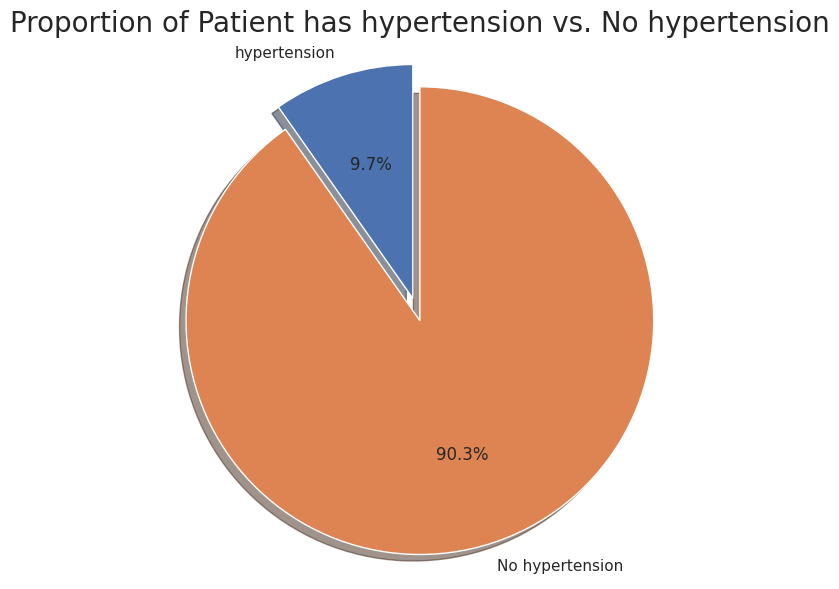

In [297]:
labels = 'hypertension', 'No hypertension'
sizes = [
    df.hypertension[df['hypertension']==1].count(),
    df.hypertension[df['hypertension']==0].count()
]
explode = (0, 0.1)

fig1, ax1 = plt.subplots(figsize=(9, 7))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of Patient has hypertension vs. No hypertension", size = 20)
plt.show()

#### Ever married

In [298]:
df["ever_married"].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

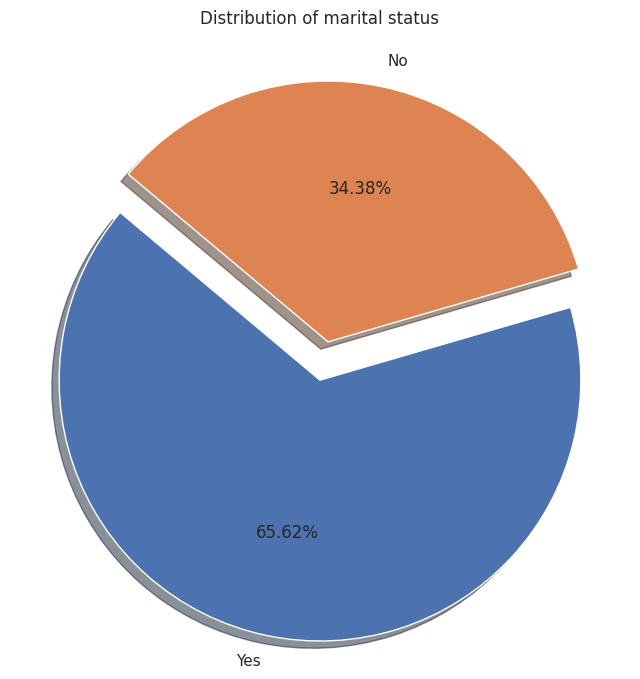

In [299]:
# Sample data (replace this with your actual data)
ever_married = list(df.ever_married.value_counts().index)
ever_married_counts = list(df.ever_married.value_counts().values)
explode = (0.1, 0.05)  # Explode the first slice (Standard)

# Create a pie chart with shadows (2D effect)
plt.figure(figsize=(8, 8))
plt.pie(
    ever_married_counts,
    labels=ever_married,
    explode=explode,
    autopct='%1.2f%%',
    startangle=140,
    shadow=True
)

# Title and aspect ratio settings
plt.title('Distribution of marital status\n')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()

In [300]:
#ever_married berdasrkan usia <18 tahun
df.loc[df["age"] < 18.0][["age", "ever_married"]]

,age,ever_married
162,1.32,No
245,14.00,No
249,3.00,No
251,8.00,No
253,14.00,No
...,...,...
5089,0.72,No
5094,13.00,No
5095,1.08,No
5098,9.00,No


#### Work type

In [301]:
#cek dengan usia
df["work_type"].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

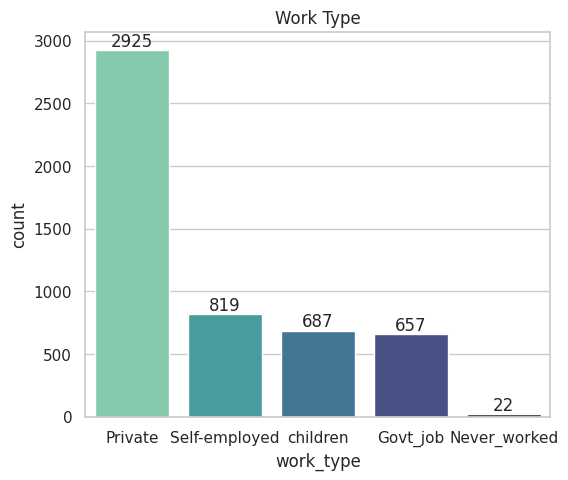

In [302]:
#plot untuk tipe pekerjaan
fig, ax = plt.subplots(figsize=(6,5))
ax=sns.countplot(x='work_type', data=df, palette='mako_r', order=df['work_type'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0);
ax.bar_label(ax.containers[0])
plt.title('Work Type')
plt.show()

In [303]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

#### Residence type


In [304]:
df["Residence_type"].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

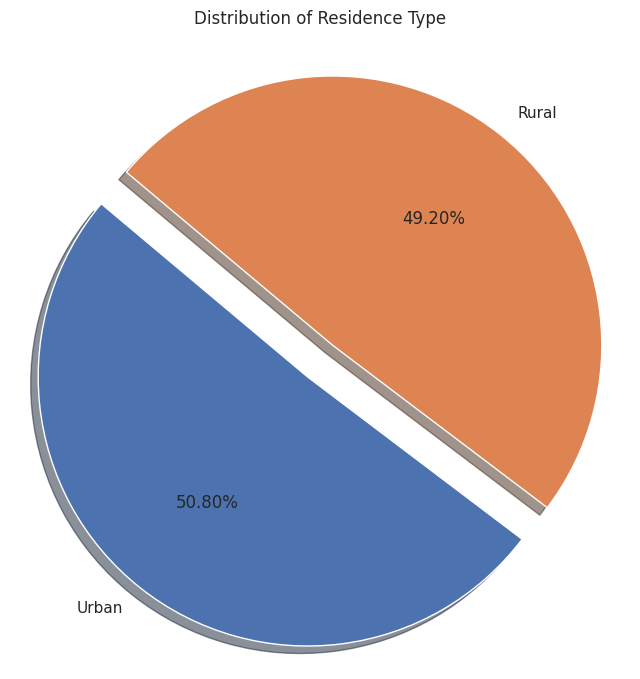

In [305]:
# Sample data (replace this with your actual data)
Residence_type = list(df.Residence_type.value_counts().index)
Residence_type_counts = list(df.Residence_type.value_counts().values)
explode = (0.1, 0.05)  # Explode the first slice (Standard)

# Create a pie chart with shadows (2D effect)
plt.figure(figsize=(8, 8))
plt.pie(
    Residence_type_counts,
    labels=Residence_type,
    explode=explode,
    autopct='%1.2f%%',
    startangle=140,
    shadow=True,
   )

# Title and aspect ratio settings
plt.title('Distribution of Residence Type\n')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()

#### smoking status

In [306]:
df["smoking_status"]. value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

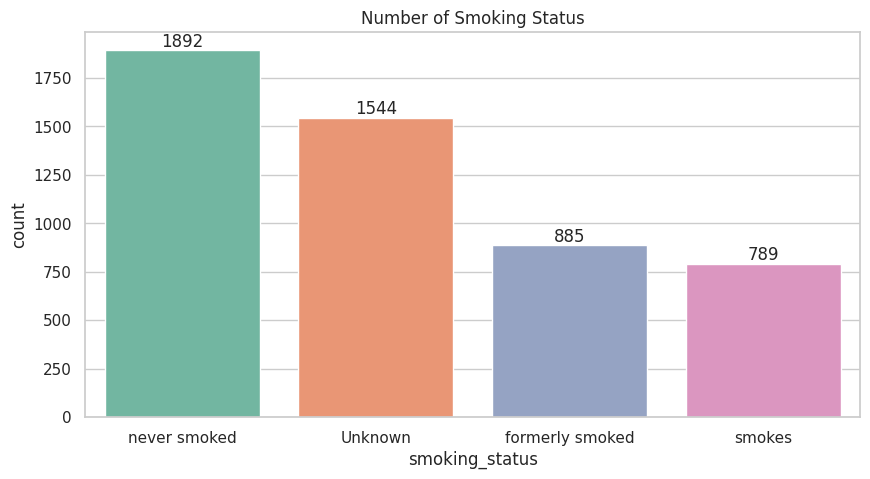

In [307]:
#plot untuk status merokok
fig, ax  = plt.subplots(figsize=(10,5))
ax=sns.countplot(x='smoking_status', data=df, palette='Set2', order = df['smoking_status'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.bar_label(ax.containers[0])
plt.title('Number of Smoking Status')
plt.show()

In [308]:
#cek merokok pada usia <18 tahun
#df.loc[df["age"] < 18.0][["smoking_status","age"]]

In [309]:
df[df["age"] < 18.0][["age","smoking_status"]]

,age,smoking_status
162,1.32,Unknown
245,14.00,Unknown
249,3.00,Unknown
251,8.00,Unknown
253,14.00,Unknown
...,...,...
5089,0.72,Unknown
5094,13.00,Unknown
5095,1.08,Unknown
5098,9.00,Unknown


In [310]:
#hitung yg unknown status merokoknya pada usia <18 tahun
total_anak = len(df[df["age"] < 18])
unknown_anak = len(df[(df["age"] < 18) & (df["smoking_status"] == "Unknown")])
persentase_unknown_anak = (unknown_anak / total_anak) * 100

print(f"Persentase anak dengan status merokok 'Unknown': {persentase_unknown_anak:.2f}%")


Persentase anak dengan status merokok 'Unknown': 79.67%


### 2.1.2 &nbsp;Dependent Columns

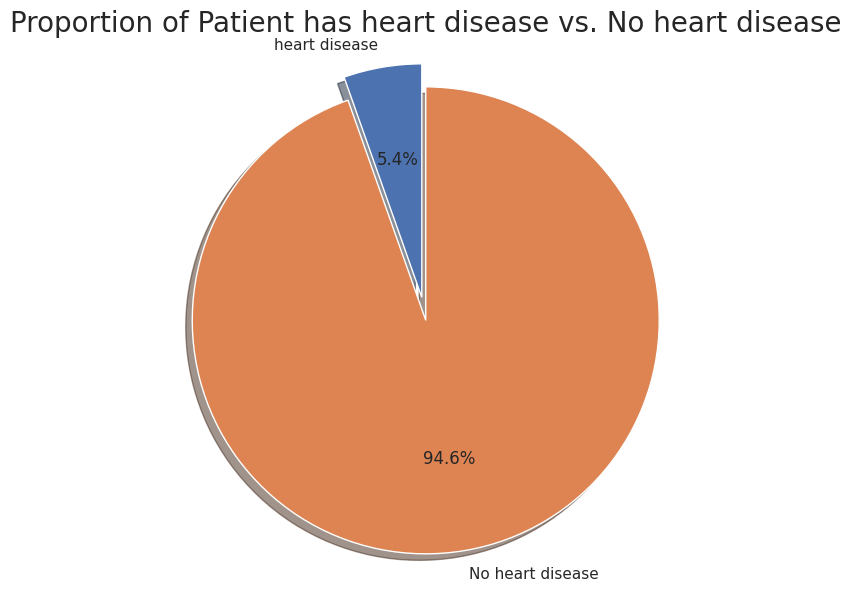

In [311]:
# MASUKIN
labels = 'heart disease', 'No heart disease'
sizes = [
    df.heart_disease[df['heart_disease']==1].count(),
    df.heart_disease[df['heart_disease']==0].count()
]
explode = (0, 0.1)

fig1, ax1 = plt.subplots(figsize=(9, 7))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of Patient has heart disease vs. No heart disease", size = 20)
plt.show()

### 2.1.3 EDA Insight


*   Pada umur terdapat umur terendah 0.08	tahun. Kemungkinan besar usia pasien yang ada dalam data ini mulai dari < 1 tahun
*   Penyakit jantung biasanya meningkat seiring dengan pertambahan usia. Tetapi penyakit jantung yang ditemukan pada usia anak-anak dan dewasa memiliki faktor risiko yang berbeda

*   dari data juga terlihat ada informasi yang kurang masuk akal: usia <18 tahun ada yang bekerja di pemerintahan, ada 17 yang tidak pernah bekerja, padahal ada direntang usia yang sama katagori work_typenya yaitu children.
*   sebanyak 1544 status merokoknya tidak diketahui
*   Ketika dicek status merokok yang tidak diketahui, kebanyakan adalah usia <17 tahun (sebanyak 682 atau 79.67%). Bahkan ada usia <1 tahun yang unknown. Padahal tidak mungkin anak diusia seperti itu akan ditemukan merokok
*   pada bmi ditemukan missing value <4%
*   hasil pemeriksaan usia dengan bmi ditemukan informasi yang tidak masuk akal yaitu usia < 1 tahun bminya ada dinatara 13 sama 33
*   Berdasarkan gender ditemukan 1 patient yg gendernya bukan laki-laki ataupun perempuan
*   berdasarkan hal hasil cleaning data disarankan menggunakan data >17 tahun, menghapus gender yang others, status merokok unknown? bmi yang nan?
*   feature engiienering-->bmi dikatagorikan menjadi....












# 3.&nbsp;Feature Engineering (FE)

In [312]:
#numerik ka katagorik
#bmi
#Below 18.5 -> Underweight
#18.5 – 24.9 -> Normal or Healthy Weight
#25.0 – 29.9 -> Overweight
#30.0 and Above -> Obese
#dalam perintah bins dibuah menjadi
#jika dalam bins kita menuliskan 0, 18.4 artinya dari 0 sampai 18.4 masuk ke under weight
#18.4, 24.9 artinya diatas 18.4 sampai 24.9 masuk ke normal
#24.9, 29.9 artinya diatas 24,9 sampai 29.9 masuk overweight
#29.9, 100 artinya diatas 29.9 sampai 100 masuk obese

df['new_bmi_range'] = pd.cut(
    x=df['bmi'],
    bins=[0, 18.4, 24.9, 29.9, 100],
    labels=["Underweight", "Healthy", "Overweight", "Obese"]
)

df['new_bmi_range'].value_counts(normalize=True)

Obese          0.391118
Overweight     0.287024
Healthy        0.253208
Underweight    0.068649
Name: new_bmi_range, dtype: float64

In [313]:
df["new_bmi_range"].value_counts()

Obese          1920
Overweight     1409
Healthy        1243
Underweight     337
Name: new_bmi_range, dtype: int64

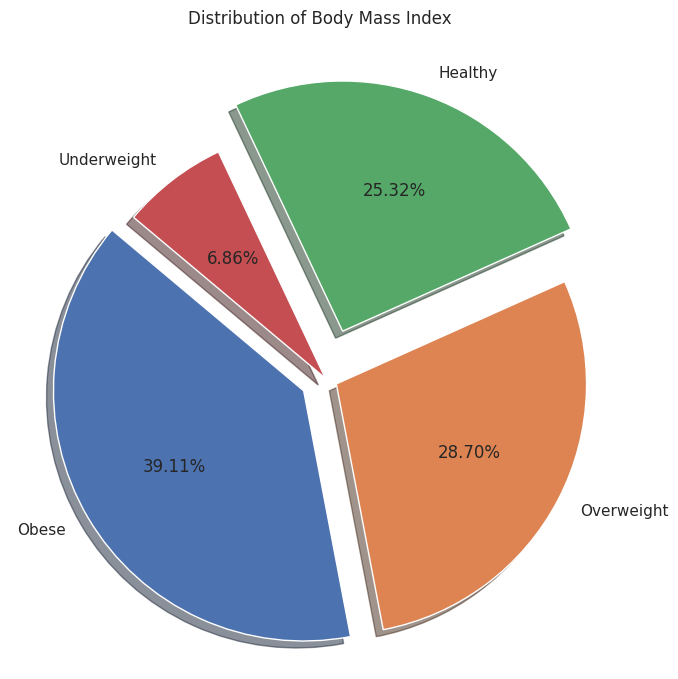

In [314]:
new_bmi_range = list(df.new_bmi_range.value_counts().index)
new_bmi_range_counts = list(df.new_bmi_range.value_counts().values)
explode = (0.1, 0.05, 0.2, 0)  # Explode the first slice (Standard)

# Create a pie chart with shadows (2D effect)
plt.figure(figsize=(8, 8))
plt.pie(
    new_bmi_range_counts,
    labels=new_bmi_range,
    explode=explode,
    autopct='%1.2f%%',
    startangle=140,
    shadow=True
)

# Title and aspect ratio settings
plt.title('Distribution of Body Mass Index\n')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()

In [315]:
df.loc[df["bmi"]== 18.50][["bmi", "new_bmi_range"]]

,bmi,new_bmi_range
1281,18.5,Healthy
1632,18.5,Healthy
1928,18.5,Healthy
1999,18.5,Healthy
2194,18.5,Healthy
2471,18.5,Healthy
2528,18.5,Healthy
2687,18.5,Healthy
3402,18.5,Healthy
3717,18.5,Healthy


In [316]:
df.loc[df["bmi"]== 18.40][["bmi", "new_bmi_range"]]

,bmi,new_bmi_range
584,18.4,Underweight
1032,18.4,Underweight
1155,18.4,Underweight
1555,18.4,Underweight
1633,18.4,Underweight
1990,18.4,Underweight
2590,18.4,Underweight
3746,18.4,Underweight
4467,18.4,Underweight
4997,18.4,Underweight


In [317]:
df.loc[df["bmi"]== 24.90][["bmi", "new_bmi_range"]]

,bmi,new_bmi_range
337,24.9,Healthy
363,24.9,Healthy
854,24.9,Healthy
991,24.9,Healthy
1205,24.9,Healthy
1334,24.9,Healthy
1507,24.9,Healthy
1820,24.9,Healthy
1854,24.9,Healthy
1862,24.9,Healthy


In [318]:
df.loc[df["bmi"]== 29.90][["bmi", "new_bmi_range"]]

,bmi,new_bmi_range
39,29.9,Overweight
136,29.9,Overweight
182,29.9,Overweight
334,29.9,Overweight
967,29.9,Overweight
1087,29.9,Overweight
1147,29.9,Overweight
1717,29.9,Overweight
1720,29.9,Overweight
1731,29.9,Overweight


In [319]:
df.drop(columns='new_bmi_range', inplace=True)

## 3.1 Data Preparation

### 3.1.1 Removing "Other" Value in Gender Column

In [320]:
df = df[df['gender'] != 'Other']

In [321]:
df.reset_index(drop=True, inplace=True)

In [322]:
df[df['gender'] == 'Other']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status


In [323]:
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

### 3.1.2 Removing Value "Age" < 18 in "Age" Column

In [324]:
df = df[df['age'] > 17]

In [325]:
df[df['age'] < 17]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status


### 3.1.3 Removing Value "Never Worked" in "worked_type" Column

In [326]:
df = df[df['work_type'] != 'Never_worked']

## 3.2.  Handling Outliers

In [327]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked


[]

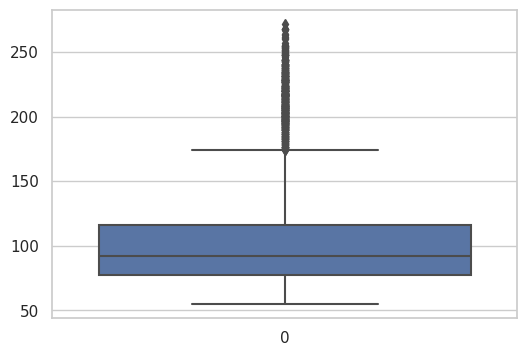

In [328]:
fig, ax = plt.subplots(figsize=(6,4))

ax = sns.boxplot(df['avg_glucose_level'], ax=ax)
plt.plot()

In [329]:
# Quartile 1 - 3
Q1, Q2, Q3 = df['avg_glucose_level'].quantile([0.25,0.5,0.75])

# Checking Upper and lower whisker
IQR = Q3 - Q1
Upper_Wisker = Q3 + (1.5*IQR)
Lower_Wisker = Q1 - (1.5*IQR)

# Print values
print("Upper Wisker=", Upper_Wisker)
print("Lower Wisker=", Lower_Wisker)

Upper Wisker= 174.1225
Lower Wisker= 19.462499999999984


In [330]:
# How many outlayers that we have
print("Outlier Numbers:", df['avg_glucose_level'][df['avg_glucose_level'] > Upper_Wisker].count())

Outlier Numbers: 593


## 3.3. Changing Data Format

### 3.3.1. avg_glucose_level Column
pustaka: https://www.cdc.gov/diabetes/basics/getting-tested.html

In [331]:
df['avg_glucose_level'] = pd.cut(
    x=df['avg_glucose_level'],
    bins=[0, 100, 125, 271.74],
    labels=["Not-Diabetes", "Pra-Diabetes", "Diabetes"]
)

df['avg_glucose_level'].value_counts(normalize=True)

Not-Diabetes    0.602401
Diabetes        0.213041
Pra-Diabetes    0.184557
Name: avg_glucose_level, dtype: float64

## 3.4. Data Analysis

### 3.4.1. Dependent variable distribution

[]

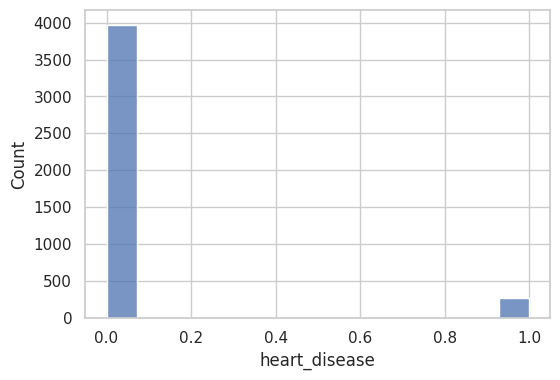

In [332]:
fig, ax = plt.subplots(figsize=(6,4))

ax = sns.histplot(df['heart_disease'], ax=ax)
plt.plot()

In [333]:
df['heart_disease'].value_counts()

0    3973
1     275
Name: heart_disease, dtype: int64

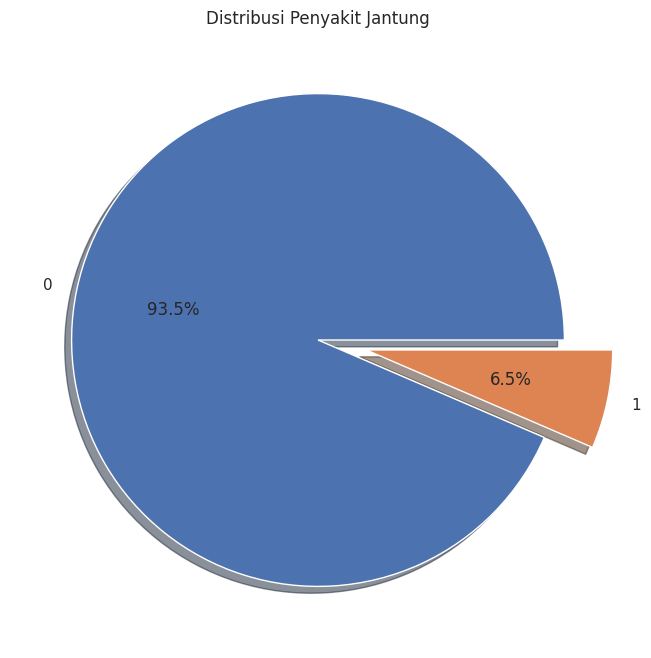

In [334]:
fig, ax = plt.subplots(figsize=(10,8))

y = df['heart_disease'].value_counts()
mylabels = df['heart_disease'].value_counts().index
plt.pie(
    y,
    labels = mylabels,
    explode = (0, 0.2),
    shadow = True,
    autopct='%1.1f%%'
)
plt.title("Distribusi Penyakit Jantung")

plt.show()

### 3.4.2. Numeric columns distribution observation

<ipython-input-335-80e3cf15cc0c>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
<ipython-input-335-80e3cf15cc0c>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)


[]

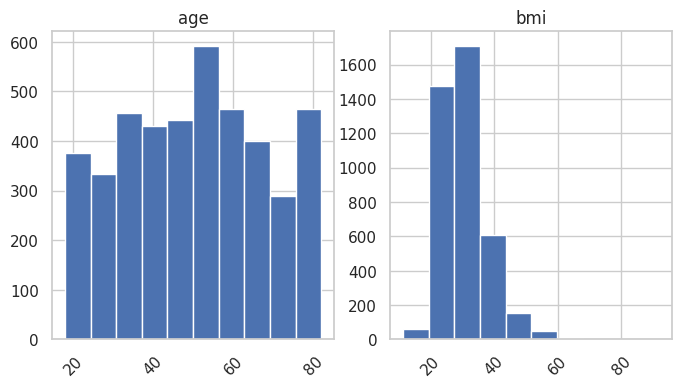

In [335]:
df.head()# Creating Canvas 2x2
fig, ax = plt.subplots(1,2, figsize=(8,4))

# Filling Canvas
ax[0].hist(df['age'])
ax[0].set_title('age')

ax[1].hist(df['bmi'])
ax[1].set_title('bmi')

# Rotate x label 90 degrees
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)

plt.plot()

### 3.4.3. Kategorical columns distribution observation

In [336]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,9046,Male,67.0,0,1,Yes,Private,Urban,Diabetes,36.6,formerly smoked
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,Diabetes,NaN,never smoked
2,31112,Male,80.0,0,1,Yes,Private,Rural,Pra-Diabetes,32.5,never smoked
3,60182,Female,49.0,0,0,Yes,Private,Urban,Diabetes,34.4,smokes
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,Diabetes,24.0,never smoked


In [337]:
df['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

<ipython-input-338-2eaf5d2abe63>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0,0].set_xticklabels(ax[0,0].get_xticklabels(), rotation=0)
<ipython-input-338-2eaf5d2abe63>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1,1].set_xticklabels(ax[1,1].get_xticklabels(), rotation=45)
<ipython-input-338-2eaf5d2abe63>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0,1].set_xticklabels(ax[0,1].get_xticklabels(), rotation=0)
<ipython-input-338-2eaf5d2abe63>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1,0].set_xticklabels(ax[1,0].get_xticklabels(), rotation=45)
<ipython-input-338-2eaf5d2abe63>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0,2].set_xticklabels(ax[0,2].get_xticklabels(), rotation=0)
<ipython-input-338-2eaf5d2abe63>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
 

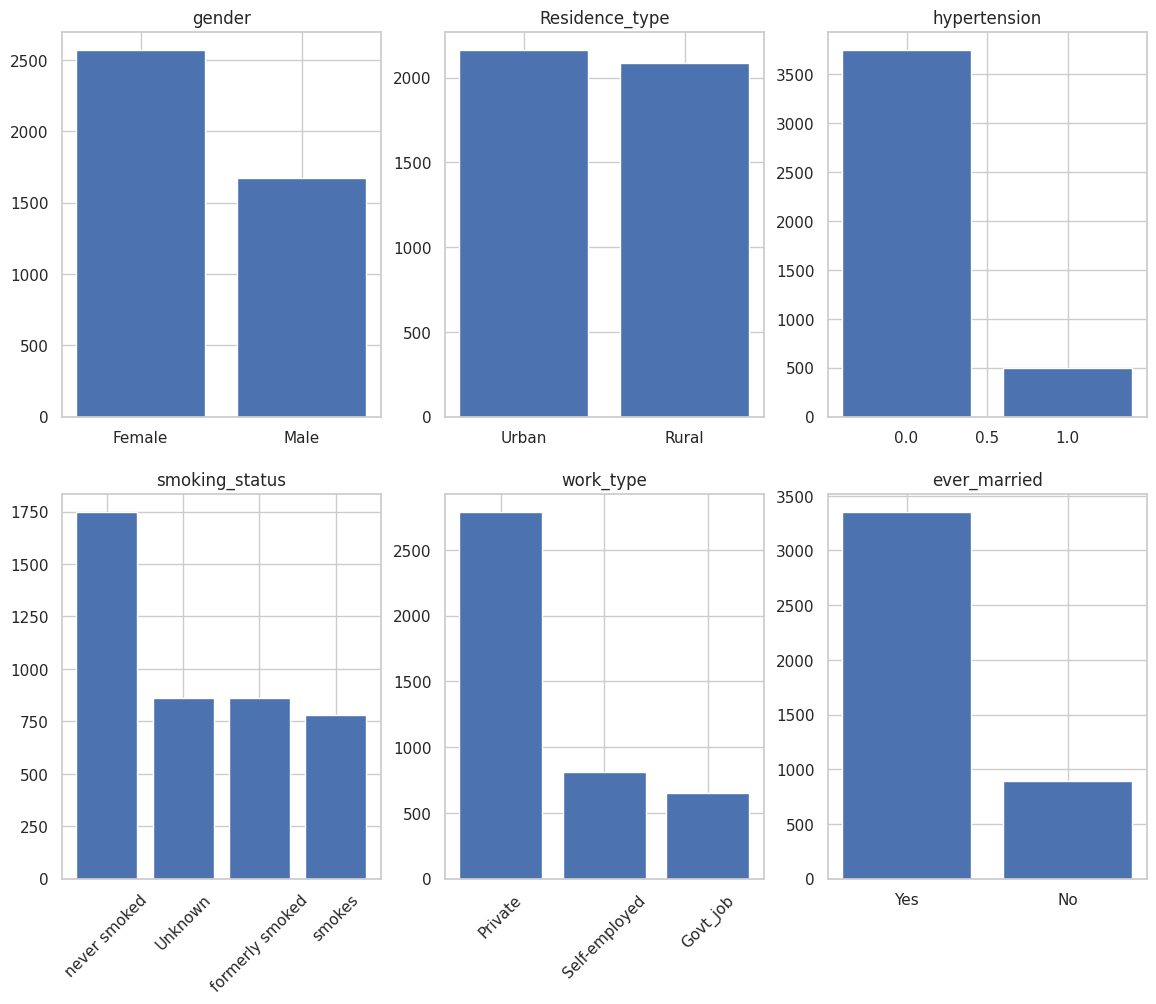

In [338]:
# Creating Canvas 2x2
fig, ax = plt.subplots(2,3, figsize=(14,11))

# Filling Canvas
ax[0,0].bar(df['gender'].value_counts().index, height=df['gender'].value_counts())
ax[0,0].set_title('gender')

ax[1,1].bar(df['work_type'].value_counts().index, height=df['work_type'].value_counts())
ax[1,1].set_title('work_type')

ax[0,1].bar(df['Residence_type'].value_counts().index, height=df['Residence_type'].value_counts())
ax[0,1].set_title('Residence_type')

ax[1,0].bar(df['smoking_status'].value_counts().index, height=df['smoking_status'].value_counts())
ax[1,0].set_title('smoking_status')

ax[0,2].bar(df['hypertension'].value_counts().index, height=df['hypertension'].value_counts())
ax[0,2].set_title('hypertension')

ax[1,2].bar(df['ever_married'].value_counts().index, height=df['ever_married'].value_counts())
ax[1,2].set_title('ever_married')

# Rotate x label 90 degrees
ax[0,0].set_xticklabels(ax[0,0].get_xticklabels(), rotation=0)
ax[1,1].set_xticklabels(ax[1,1].get_xticklabels(), rotation=45)
ax[0,1].set_xticklabels(ax[0,1].get_xticklabels(), rotation=0)
ax[1,0].set_xticklabels(ax[1,0].get_xticklabels(), rotation=45)
ax[0,2].set_xticklabels(ax[0,2].get_xticklabels(), rotation=0)
ax[1,2].set_xticklabels(ax[1,2].get_xticklabels(), rotation=0)

plt.show()

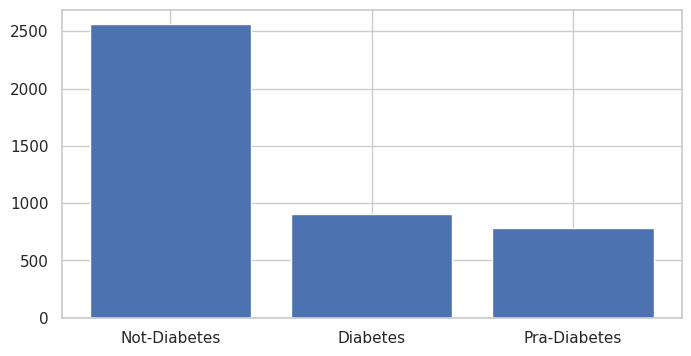

In [339]:
# Creating Canvas 2x2
fig, ax = plt.subplots(figsize=(8,4))

# Filling Canvas
ax.bar(df['avg_glucose_level'].value_counts().index, height=df['avg_glucose_level'].value_counts())

plt.show()

In [340]:
print(df['gender'].value_counts())
print('=============')
print(df['smoking_status'].value_counts())
print('=============')
print(df['hypertension'].value_counts())
print('=============')
print(df['ever_married'].value_counts())
print('=============')
print(df['work_type'].value_counts())
print('=============')
print(df['Residence_type'].value_counts())
print('=============')
print(df['avg_glucose_level'].value_counts())

Female    2572
Male      1676
Name: gender, dtype: int64
never smoked       1749
Unknown             860
formerly smoked     859
smokes              780
Name: smoking_status, dtype: int64
0    3751
1     497
Name: hypertension, dtype: int64
Yes    3353
No      895
Name: ever_married, dtype: int64
Private          2790
Self-employed     807
Govt_job          651
Name: work_type, dtype: int64
Urban    2164
Rural    2084
Name: Residence_type, dtype: int64
Not-Diabetes    2559
Diabetes         905
Pra-Diabetes     784
Name: avg_glucose_level, dtype: int64


## 3.5. Data Encoding

In [341]:
dfe = df.copy()

In [342]:
dfe

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,9046,Male,67.0,0,1,Yes,Private,Urban,Diabetes,36.6,formerly smoked
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,Diabetes,NaN,never smoked
2,31112,Male,80.0,0,1,Yes,Private,Rural,Pra-Diabetes,32.5,never smoked
3,60182,Female,49.0,0,0,Yes,Private,Urban,Diabetes,34.4,smokes
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,Diabetes,24.0,never smoked
...,...,...,...,...,...,...,...,...,...,...,...
5104,18234,Female,80.0,1,0,Yes,Private,Urban,Not-Diabetes,NaN,never smoked
5105,44873,Female,81.0,0,0,Yes,Self-employed,Urban,Diabetes,40.0,never smoked
5106,19723,Female,35.0,0,0,Yes,Self-employed,Rural,Not-Diabetes,30.6,never smoked
5107,37544,Male,51.0,0,0,Yes,Private,Rural,Diabetes,25.6,formerly smoked


In [343]:
# Handling Smoke Columns
Urutan = ['never smoked', 'Unknown', 'formerly smoked', 'smokes']
oe = OrdinalEncoder(categories=[Urutan])

dfe["smoking_status_oe"] = oe.fit_transform(dfe[["smoking_status"]])

In [344]:
# Handling work_type Columns
Urutan = ['Self-employed', 'Govt_job',  'Private']
oe = OrdinalEncoder(categories=[Urutan])

dfe["work_type_oe"] = oe.fit_transform(dfe[["work_type"]])

In [345]:
# Handling Gender Columns
Urutan = ['Male', 'Female']
oe = OrdinalEncoder(categories=[Urutan])

dfe["gender_oe"] = oe.fit_transform(dfe[["gender"]])

In [346]:
# Handling Ever Married Columns
Urutan = ['Yes', 'No']
oe = OrdinalEncoder(categories=[Urutan])

dfe["ever_married_oe"] = oe.fit_transform(dfe[["ever_married"]])

In [347]:
# Handling Ever Married Columns
Urutan = ['Rural', 'Urban']
oe = OrdinalEncoder(categories=[Urutan])

dfe["Residence_type_oe"] = oe.fit_transform(dfe[["Residence_type"]])

In [348]:
# Handling Ever Married Columns
Urutan = ['Not-Diabetes', 'Pra-Diabetes', 'Diabetes']
oe = OrdinalEncoder(categories=[Urutan])

dfe["avg_glucose_level_oe"] = oe.fit_transform(dfe[["avg_glucose_level"]])

In [349]:
print(dfe[['gender', 'gender_oe']].value_counts())
print('===================')
print(dfe[['ever_married', 'ever_married_oe']].value_counts())
print('===================')
print(dfe[['work_type', 'work_type_oe']].value_counts())
print('===================')
print(dfe[['smoking_status', 'smoking_status_oe']].value_counts())
print('===================')
print(dfe[['Residence_type', 'Residence_type_oe']].value_counts())
print('===================')
print(dfe[['avg_glucose_level', 'avg_glucose_level_oe']].value_counts())

gender  gender_oe
Female  1.0          2572
Male    0.0          1676
dtype: int64
ever_married  ever_married_oe
Yes           0.0                3353
No            1.0                 895
dtype: int64
work_type      work_type_oe
Private        2.0             2790
Self-employed  0.0              807
Govt_job       1.0              651
dtype: int64
smoking_status   smoking_status_oe
never smoked     0.0                  1749
Unknown          1.0                   860
formerly smoked  2.0                   859
smokes           3.0                   780
dtype: int64
Residence_type  Residence_type_oe
Urban           1.0                  2164
Rural           0.0                  2084
dtype: int64
avg_glucose_level  avg_glucose_level_oe
Not-Diabetes       0.0                     2559
Diabetes           2.0                      905
Pra-Diabetes       1.0                      784
dtype: int64


In [350]:
# Jika ingin menggunakan label encoder
"""
le = LabelEncoder()

# Label encoder several columns
dfe['gender_enc'] = le.fit_transform(dfe['gender'])
dfe['ever_married_enc'] = le.fit_transform(dfe['ever_married'])
dfe['work_type_enc'] = le.fit_transform(dfe['work_type'])
dfe['Residence_type_enc'] = le.fit_transform(dfe['Residence_type'])
dfe['smoking_status_enc'] = le.fit_transform(dfe['smoking_status'])
dfe['avg_glucose_level_enc'] = le.fit_transform(dfe['avg_glucose_level'])
"""

"\nle = LabelEncoder()\n\n# Label encoder several columns\ndfe['gender_enc'] = le.fit_transform(dfe['gender'])\ndfe['ever_married_enc'] = le.fit_transform(dfe['ever_married'])\ndfe['work_type_enc'] = le.fit_transform(dfe['work_type'])\ndfe['Residence_type_enc'] = le.fit_transform(dfe['Residence_type'])\ndfe['smoking_status_enc'] = le.fit_transform(dfe['smoking_status'])\ndfe['avg_glucose_level_enc'] = le.fit_transform(dfe['avg_glucose_level'])\n"

In [351]:
dfe = dfe.drop(columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'id', 'avg_glucose_level'])

In [352]:
dfe.head()

,age,hypertension,heart_disease,bmi,smoking_status_oe,work_type_oe,gender_oe,ever_married_oe,Residence_type_oe,avg_glucose_level_oe
0,67.0,0,1,36.6,2.0,2.0,0.0,0.0,1.0,2.0
1,61.0,0,0,NaN,0.0,0.0,1.0,0.0,0.0,2.0
2,80.0,0,1,32.5,0.0,2.0,0.0,0.0,0.0,1.0
3,49.0,0,0,34.4,3.0,2.0,1.0,0.0,1.0,2.0
4,79.0,1,0,24.0,0.0,0.0,1.0,0.0,0.0,2.0


## 3.6. Handling Missing Values

In [353]:
dfe

,age,hypertension,heart_disease,bmi,smoking_status_oe,work_type_oe,gender_oe,ever_married_oe,Residence_type_oe,avg_glucose_level_oe
0,67.0,0,1,36.6,2.0,2.0,0.0,0.0,1.0,2.0
1,61.0,0,0,NaN,0.0,0.0,1.0,0.0,0.0,2.0
2,80.0,0,1,32.5,0.0,2.0,0.0,0.0,0.0,1.0
3,49.0,0,0,34.4,3.0,2.0,1.0,0.0,1.0,2.0
4,79.0,1,0,24.0,0.0,0.0,1.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...
5104,80.0,1,0,NaN,0.0,2.0,1.0,0.0,1.0,0.0
5105,81.0,0,0,40.0,0.0,0.0,1.0,0.0,1.0,2.0
5106,35.0,0,0,30.6,0.0,0.0,1.0,0.0,0.0,0.0
5107,51.0,0,0,25.6,2.0,2.0,0.0,0.0,0.0,2.0


In [354]:
# Imputasi nilai null value menggunakan KNN Imputation
KNNimputer = KNNImputer(n_neighbors=3)
KNN_impute = pd.DataFrame(
    data = KNNimputer.fit_transform(dfe).round(1),
    columns= dfe.columns
)

# Imputasi nilai null value dengan menggunakan Simple Imputer Strategy Median
SIimputer = SimpleImputer(strategy='median')
Median_impute = pd.DataFrame(
    data=SIimputer.fit_transform(dfe).round(1),
    columns=dfe.columns
)

# Imputasi nilai null value dengan menggunakan Simple Imputer Strategy Mean
SIIimputer = SimpleImputer(strategy='mean')
Mean_impute = pd.DataFrame(
    data=SIIimputer.fit_transform(dfe).round(1),
    columns=dfe.columns
)

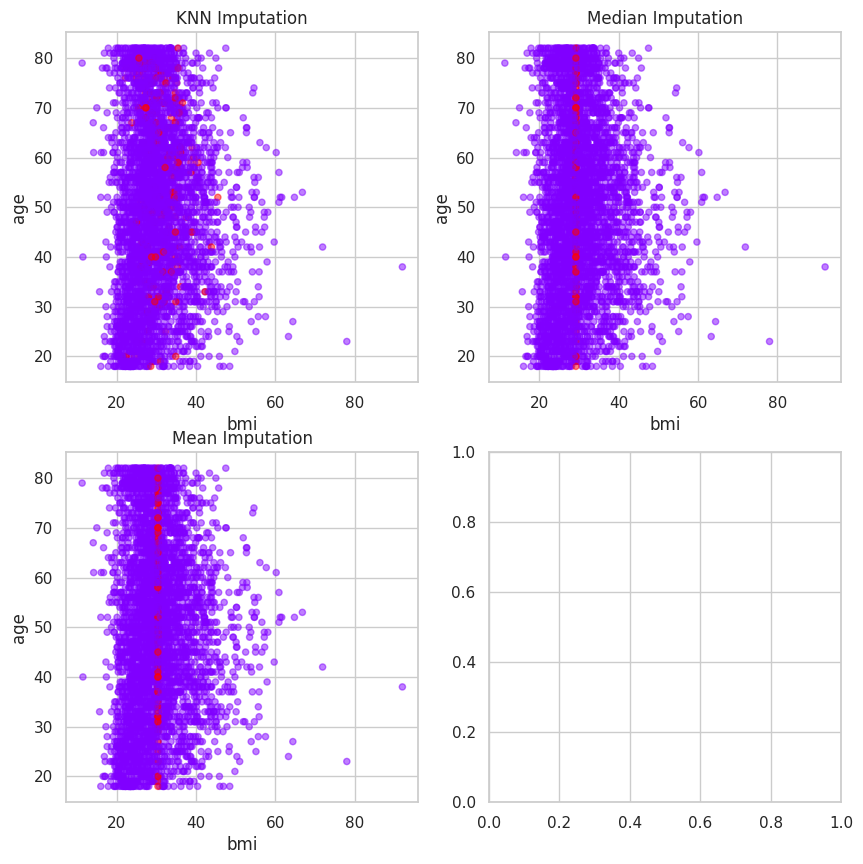

In [355]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
nullity = dfe['bmi'].isnull() + dfe['age'].isnull()
imputations = {
    'KNN Imputation': KNN_impute,
    'Median Imputation': Median_impute,
    'Mean Imputation': Mean_impute,
}

for ax, df_key in zip(axes.flatten(), imputations):
    imputations[df_key].plot(
        x='bmi',
        y='age',
        kind='scatter',
        alpha=0.5,
        c=nullity,
        cmap='rainbow',
        ax=ax,
        colorbar=False, title=df_key
    )

In [356]:
# Imputasi nilai null value dengan menggunakan Simple Imputer Strategy Median
SIimputer = SimpleImputer(strategy='median')
dfe = pd.DataFrame(
    data=SIimputer.fit_transform(dfe).round(1),
    columns=dfe.columns
)

## 3.7. Change BMI to Categorical Data

Pustaka:
https://www.cdc.gov/healthyweight/assessing/index.html

BMI is a person’s weight in kilograms divided by the square of height in meters. A high BMI can indicate high body fatness, and a low BMI can indicate too low body fatness. To calculate your BMI, see the BMI Calculator. Or determine your BMI by finding your height and weight in this BMI Index Chart.

- If your BMI is less than 18.5, it falls within the underweight range.
- If your BMI is 18.5 to 24.9, it falls within the Healthy Weight range.
- If your BMI is 25.0 to 29.9, it falls within the overweight range.
- If your BMI is 30.0 or higher, it falls within the obese range.

Weight that is higher than what is considered as a healthy weight for a given height is described as overweight or obese. Weight that is lower than what is considered as healthy for a given height is described as underweight.

- Underweight = 0
- Healthy Weight = 1
- Overweight = 2
- Obese = 3

In [357]:
dfe['bmi'] = pd.cut(
    x=dfe['bmi'],
    bins=[0, 24.9, 29.9, 100],
    labels=["Healthy", "Overweight", "Obese"]
)

In [358]:
# Handling BMI Columns
Urutan = ['Healthy', 'Overweight', 'Obese']
oe = OrdinalEncoder(categories=[Urutan])

dfe["bmi_oe"] = oe.fit_transform(dfe[["bmi"]])

In [359]:
dfe

,age,hypertension,heart_disease,bmi,smoking_status_oe,work_type_oe,gender_oe,ever_married_oe,Residence_type_oe,avg_glucose_level_oe,bmi_oe
0,67.0,0.0,1.0,Obese,2.0,2.0,0.0,0.0,1.0,2.0,2.0
1,61.0,0.0,0.0,Overweight,0.0,0.0,1.0,0.0,0.0,2.0,1.0
2,80.0,0.0,1.0,Obese,0.0,2.0,0.0,0.0,0.0,1.0,2.0
3,49.0,0.0,0.0,Obese,3.0,2.0,1.0,0.0,1.0,2.0,2.0
4,79.0,1.0,0.0,Healthy,0.0,0.0,1.0,0.0,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4243,80.0,1.0,0.0,Overweight,0.0,2.0,1.0,0.0,1.0,0.0,1.0
4244,81.0,0.0,0.0,Obese,0.0,0.0,1.0,0.0,1.0,2.0,2.0
4245,35.0,0.0,0.0,Obese,0.0,0.0,1.0,0.0,0.0,0.0,2.0
4246,51.0,0.0,0.0,Overweight,2.0,2.0,0.0,0.0,0.0,2.0,1.0


In [360]:
dfe[['bmi','bmi_oe']].value_counts()

bmi         bmi_oe
Obese       2.0       1851
Overweight  1.0       1499
Healthy     0.0        898
dtype: int64

In [361]:
dfe.drop(columns='bmi', inplace=True)

In [362]:
dfe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4248 entries, 0 to 4247
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   4248 non-null   float64
 1   hypertension          4248 non-null   float64
 2   heart_disease         4248 non-null   float64
 3   smoking_status_oe     4248 non-null   float64
 4   work_type_oe          4248 non-null   float64
 5   gender_oe             4248 non-null   float64
 6   ever_married_oe       4248 non-null   float64
 7   Residence_type_oe     4248 non-null   float64
 8   avg_glucose_level_oe  4248 non-null   float64
 9   bmi_oe                4248 non-null   float64
dtypes: float64(10)
memory usage: 332.0 KB


In [363]:
dfe

,age,hypertension,heart_disease,smoking_status_oe,work_type_oe,gender_oe,ever_married_oe,Residence_type_oe,avg_glucose_level_oe,bmi_oe
0,67.0,0.0,1.0,2.0,2.0,0.0,0.0,1.0,2.0,2.0
1,61.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0
2,80.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,2.0
3,49.0,0.0,0.0,3.0,2.0,1.0,0.0,1.0,2.0,2.0
4,79.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...
4243,80.0,1.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,1.0
4244,81.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,2.0
4245,35.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
4246,51.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,2.0,1.0


## 3.8. Handling Imbalance Data With SMOTE

In [364]:
dfe.head()

,age,hypertension,heart_disease,smoking_status_oe,work_type_oe,gender_oe,ever_married_oe,Residence_type_oe,avg_glucose_level_oe,bmi_oe
0,67.0,0.0,1.0,2.0,2.0,0.0,0.0,1.0,2.0,2.0
1,61.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0
2,80.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,2.0
3,49.0,0.0,0.0,3.0,2.0,1.0,0.0,1.0,2.0,2.0
4,79.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0


In [365]:
# Memisahkan fitur dan target
X = dfe.drop('heart_disease', axis=1)  # Mengambil semua fitur kecuali heart_disease
y = dfe['heart_disease']  # Kolom target

# Inisialisasi objek SMOTE
smote = SMOTE(random_state=42)

# Melakukan oversampling dengan SMOTE
X_resampled, y_resampled = smote.fit_resample(X, y)

In [366]:
dfs = X_resampled.join(y_resampled).round(1)

### 3.8.1 Analisis Data After SMOTE

In [367]:
dfe

,age,hypertension,heart_disease,smoking_status_oe,work_type_oe,gender_oe,ever_married_oe,Residence_type_oe,avg_glucose_level_oe,bmi_oe
0,67.0,0.0,1.0,2.0,2.0,0.0,0.0,1.0,2.0,2.0
1,61.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0
2,80.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,2.0
3,49.0,0.0,0.0,3.0,2.0,1.0,0.0,1.0,2.0,2.0
4,79.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...
4243,80.0,1.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,1.0
4244,81.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,2.0
4245,35.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
4246,51.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,2.0,1.0


In [368]:
dfs

,age,hypertension,smoking_status_oe,work_type_oe,gender_oe,ever_married_oe,Residence_type_oe,avg_glucose_level_oe,bmi_oe,heart_disease
0,67.0,0.0,2.0,2.0,0.0,0.0,1.0,2.0,2.0,1.0
1,61.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0
2,80.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,2.0,1.0
3,49.0,0.0,3.0,2.0,1.0,0.0,1.0,2.0,2.0,0.0
4,79.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
7941,67.0,0.4,0.0,2.0,0.0,0.0,0.6,2.0,1.4,1.0
7942,49.8,0.8,3.0,1.2,1.0,0.8,0.8,0.0,0.8,1.0
7943,67.5,0.5,2.0,2.0,0.5,0.0,1.0,2.0,2.0,1.0
7944,73.0,0.0,1.3,2.0,0.0,0.0,0.0,0.0,1.6,1.0


<ipython-input-369-dbb5b4061898>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0,0].set_xticklabels(ax[0,0].get_xticklabels(), rotation=45)
<ipython-input-369-dbb5b4061898>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0,1].set_xticklabels(ax[0,1].get_xticklabels(), rotation=45)
<ipython-input-369-dbb5b4061898>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1,0].set_xticklabels(ax[1,0].get_xticklabels(), rotation=45)
<ipython-input-369-dbb5b4061898>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1,1].set_xticklabels(ax[1,1].get_xticklabels(), rotation=45)


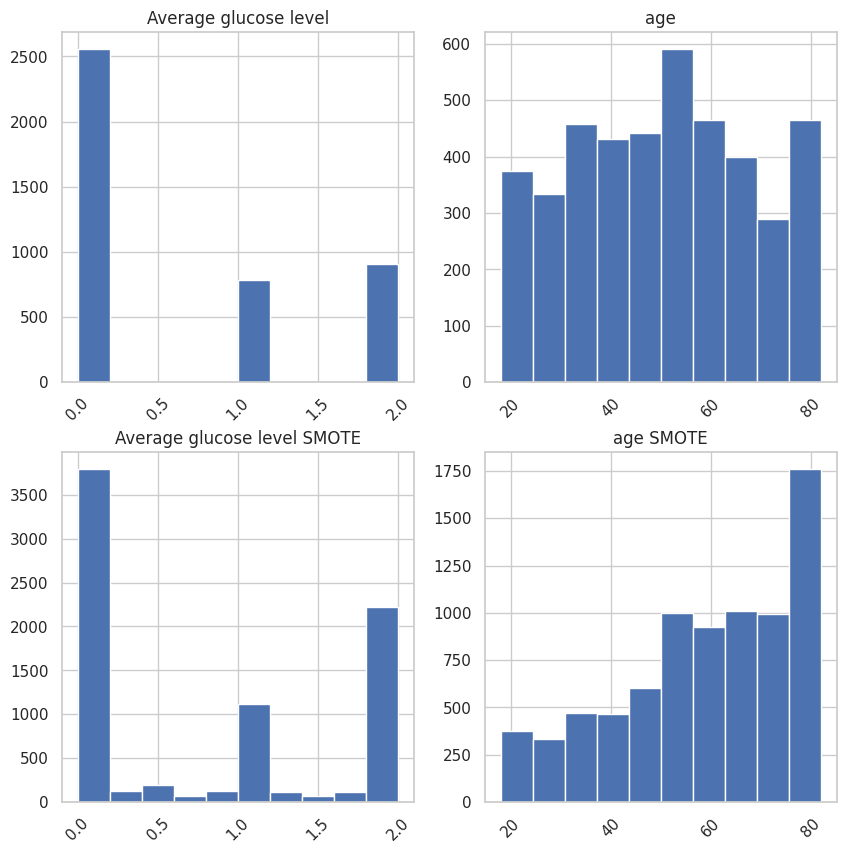

In [369]:
# Creating Canvas 2x2
fig, ax = plt.subplots(2,2, figsize=(10,10))

# Filling Canvas
ax[0,0].hist(dfe['avg_glucose_level_oe'])
ax[0,0].set_title('Average glucose level')

ax[0,1].hist(dfe['age'])
ax[0,1].set_title('age')

ax[1,0].hist(dfs['avg_glucose_level_oe'])
ax[1,0].set_title('Average glucose level SMOTE')

ax[1,1].hist(dfs['age'])
ax[1,1].set_title('age SMOTE')

# Rotate x label 90 degrees
ax[0,0].set_xticklabels(ax[0,0].get_xticklabels(), rotation=45)
ax[0,1].set_xticklabels(ax[0,1].get_xticklabels(), rotation=45)
ax[1,0].set_xticklabels(ax[1,0].get_xticklabels(), rotation=45)
ax[1,1].set_xticklabels(ax[1,1].get_xticklabels(), rotation=45)

plt.show()

## 3.9. Our Dataset

In [370]:
# Original Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4248 entries, 0 to 5108
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 4248 non-null   int64   
 1   gender             4248 non-null   object  
 2   age                4248 non-null   float64 
 3   hypertension       4248 non-null   int64   
 4   heart_disease      4248 non-null   int64   
 5   ever_married       4248 non-null   object  
 6   work_type          4248 non-null   object  
 7   Residence_type     4248 non-null   object  
 8   avg_glucose_level  4248 non-null   category
 9   bmi                4067 non-null   float64 
 10  smoking_status     4248 non-null   object  
dtypes: category(1), float64(2), int64(3), object(5)
memory usage: 498.4+ KB


In [371]:
# mengubah tipe data untuk ML
dfe['hypertension'] = dfe['hypertension'].astype(int)
dfe['heart_disease'] = dfe['heart_disease'].astype(int)
dfe['smoking_status_oe'] = dfe['smoking_status_oe'].astype(int)
dfe['work_type_oe'] = dfe['work_type_oe'].astype(int)
dfe['gender_oe'] = dfe['gender_oe'].astype(int)
dfe['ever_married_oe'] = dfe['ever_married_oe'].astype(int)
dfe['Residence_type_oe'] = dfe['Residence_type_oe'].astype(int)
dfe['avg_glucose_level_oe'] = dfe['avg_glucose_level_oe'].astype(int)
dfe['bmi_oe'] = dfe['bmi_oe'].astype(int)

In [372]:
# Dataset After Encode
dfe

,age,hypertension,heart_disease,smoking_status_oe,work_type_oe,gender_oe,ever_married_oe,Residence_type_oe,avg_glucose_level_oe,bmi_oe
0,67.0,0,1,2,2,0,0,1,2,2
1,61.0,0,0,0,0,1,0,0,2,1
2,80.0,0,1,0,2,0,0,0,1,2
3,49.0,0,0,3,2,1,0,1,2,2
4,79.0,1,0,0,0,1,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...
4243,80.0,1,0,0,2,1,0,1,0,1
4244,81.0,0,0,0,0,1,0,1,2,2
4245,35.0,0,0,0,0,1,0,0,0,2
4246,51.0,0,0,2,2,0,0,0,2,1


In [373]:
# mengubah tipe data untuk ML
dfs['hypertension'] = dfs['hypertension'].astype(int)
dfs['heart_disease'] = dfs['heart_disease'].astype(int)
dfs['smoking_status_oe'] = dfs['smoking_status_oe'].astype(int)
dfs['work_type_oe'] = dfs['work_type_oe'].astype(int)
dfs['gender_oe'] = dfs['gender_oe'].astype(int)
dfs['ever_married_oe'] = dfs['ever_married_oe'].astype(int)
dfs['Residence_type_oe'] = dfs['Residence_type_oe'].astype(int)
dfs['avg_glucose_level_oe'] = dfs['avg_glucose_level_oe'].astype(int)
dfs['bmi_oe'] = dfs['bmi_oe'].astype(int)

# 4.&nbsp;Model Preparation

In [374]:
dependent_variable_name = "heart_disease"

In [375]:
def model_prepare(df_model):

    X = df_model.loc[:, df_model.columns != dependent_variable_name]
    y = df_model[dependent_variable_name]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    return X_train, X_test, y_train, y_test

# 5.&nbsp;Apply Model

In [376]:
# model_prepare test, train split 0.2
X_train_s, X_test_s, y_train_s, y_test_s = model_prepare(df_model=dfs)

In [377]:
# model_prepare test, train split 0.2
X_train_e, X_test_e, y_train_e, y_test_e = model_prepare(df_model=dfe)

### 5.1. Model Training

This is for all RandomForestClassifier, GradientBoostingClassifier, XGBClassifier, and LGBMClassifier model objects:

In [378]:
def data_training(X_train, X_test, y_train, y_test):

    models = []
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('CART', DecisionTreeClassifier()))
    models.append(('RF', RandomForestClassifier()))
    models.append(('GBM', GradientBoostingClassifier()))
    models.append(('XGBoost', XGBClassifier()))
    models.append(('LightGBM', LGBMClassifier()))

    res_cols = ["model", "accuracy_score", "scale_method", "0_precision", "0_recall", "1_precision", "1_recall"]
    df_result = pd.DataFrame(columns=res_cols)
    index = 0
    for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        score = accuracy_score(y_test, y_pred)
        class_report = classification_report(y_test, y_pred, digits=2, output_dict=True)
        zero_report = class_report['0']
        one_report = class_report['1']

        idx_res_values = [name, score, "NA", zero_report['precision'], zero_report['recall'], one_report['precision'], one_report['recall']]
        # df_result.at[index, res_cols] = idx_res_values
        df_result.loc[index, res_cols] = idx_res_values
        index += 1
    df_result = df_result.sort_values("accuracy_score", ascending=False).reset_index(drop=True)
    return df_result

In [379]:
training_result_e = data_training(X_train_e, X_test_e, y_train_e, y_test_e)
training_result_e

[LightGBM] [Info] Number of positive: 204, number of negative: 2982
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000357 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 95
[LightGBM] [Info] Number of data points in the train set: 3186, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.064030 -> initscore=-2.682230
[LightGBM] [Info] Start training from score -2.682230


,model,accuracy_score,scale_method,0_precision,0_recall,1_precision,1_recall
0,KNN,0.928437,NA,0.932829,0.994955,0.0,0.0
1,GBM,0.928437,NA,0.932829,0.994955,0.0,0.0
2,LightGBM,0.922787,NA,0.934097,0.986882,0.133333,0.028169
3,RF,0.920904,NA,0.934803,0.983855,0.157895,0.042254
4,XGBoost,0.917137,NA,0.937076,0.976791,0.206897,0.084507
5,CART,0.887006,NA,0.940344,0.938446,0.164384,0.169014


In [380]:
training_result_s = data_training(X_train_s, X_test_s, y_train_s, y_test_s)
training_result_s

[LightGBM] [Info] Number of positive: 2976, number of negative: 2983
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000380 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 264
[LightGBM] [Info] Number of data points in the train set: 5959, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499413 -> initscore=-0.002349
[LightGBM] [Info] Start training from score -0.002349


,model,accuracy_score,scale_method,0_precision,0_recall,1_precision,1_recall
0,RF,0.934071,NA,0.956429,0.909091,0.913958,0.958877
1,XGBoost,0.926522,NA,0.949893,0.9,0.905624,0.952859
2,CART,0.91696,NA,0.938363,0.891919,0.897706,0.941825
3,LightGBM,0.906895,NA,0.932331,0.876768,0.88447,0.93681
4,KNN,0.857574,NA,0.916372,0.785859,0.813708,0.928786
5,GBM,0.849522,NA,0.886034,0.80101,0.819597,0.897693


# 6.&nbsp;Model Deployment



In [381]:
def basic_model(model, x_train, y_train):
  """
  Executing the machine learning model
  as a benchmark
  """

  clf = model
  return clf.fit(x_train, y_train)


In [382]:
def evaluation(model, x_train, x_test, y_train, y_test):
  """
  evaluate the model
  """
  clf = model

  y_predict_train = clf.predict(x_train)
  y_predict_test = clf.predict(x_test)

  training_acc = accuracy_score(y_train, y_predict_train)
  testing_acc = accuracy_score(y_test, y_predict_test)

  print("Training Accuracy: {:.2}".format(training_acc))
  print("Testing Accuracy: {:.2}".format(testing_acc))

  return print(classification_report(y_test, y_predict_test))


In [383]:
# Logistic Regression
my_model = basic_model(RandomForestClassifier(), X_train_s, y_train_s)

evaluation(my_model, X_train_s, X_test_s, y_train_s, y_test_s)

Training Accuracy: 0.99
Testing Accuracy: 0.93
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       990
           1       0.91      0.96      0.94       997

    accuracy                           0.93      1987
   macro avg       0.93      0.93      0.93      1987
weighted avg       0.93      0.93      0.93      1987



## 6.1. Install Streamlit

In [384]:
import joblib

# Save the model
joblib.dump(my_model, 'model_RF.pkl')

['model_RF.pkl']